In [1]:
import sys

# Conda enviroment paths
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/lib')
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/Mod/Fem')

import ObjectsFem
import FreeCAD
import numpy as np
import pandas as pd
import mplhep as hep
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

In [2]:
plt.style.use(hep.style.ATLAS)
plt.rcParams['font.size'] = 10

In [3]:
doc_name = 'hex_1250'

timeEnd = 7_200 # 2hrs
timeStep = 1_800 # 1/2 hr

timeArray = np.arange(timeStep, timeEnd+timeStep, timeStep, dtype=int)

doc = FreeCAD.open(f'files/{doc_name}/{doc_name}_therm.FCStd')

results_list = [doc.getObject(f'CCX_Time_{time}_0_Results') for time in timeArray]
mesh_obj = doc.getObject('MeshGmsh')
model_obj = doc.getObject('Container')

# Isometric view plots

Max Temperature: 490.644 [K]
Min Temperature: 300.15 [K]


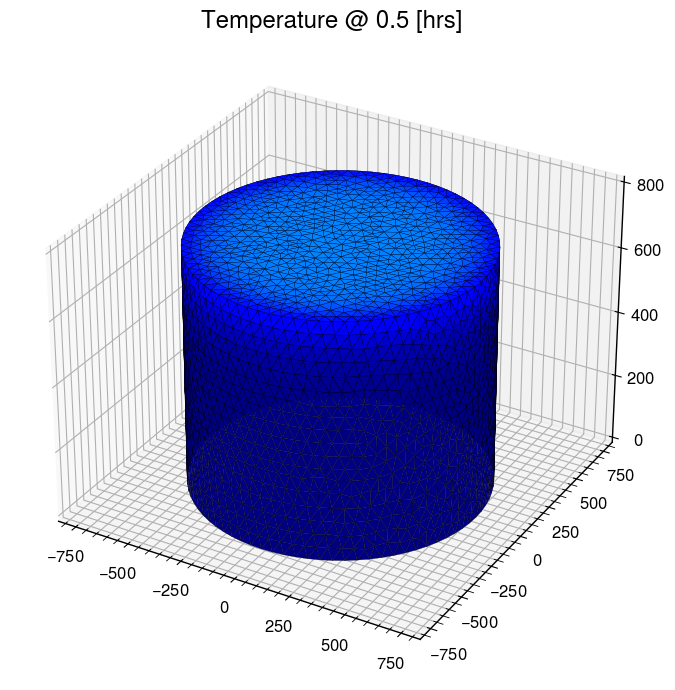

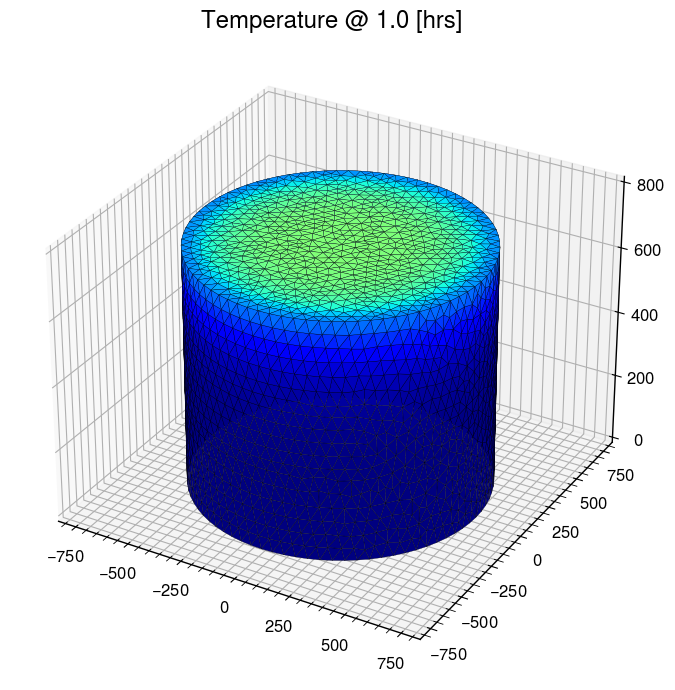

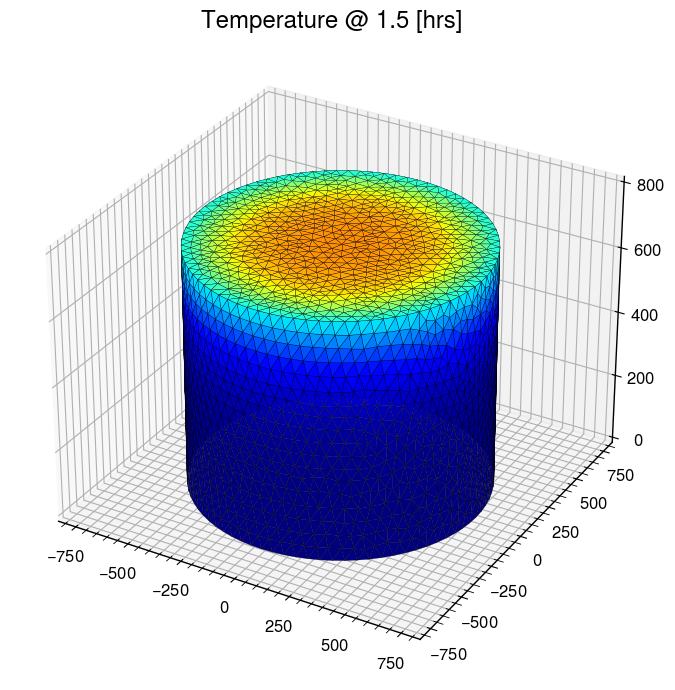

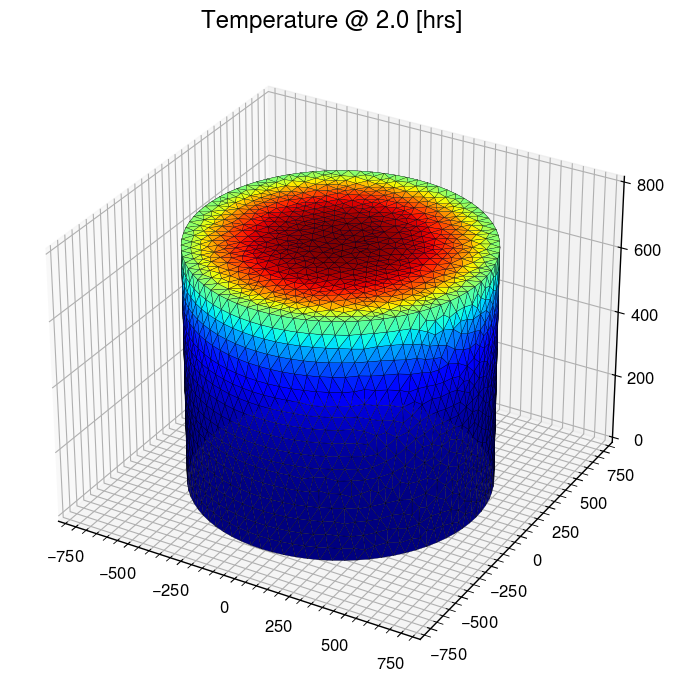

In [4]:
max_temp = np.max([results.Temperature for results in results_list])
min_temp = np.min([results.Temperature for results in results_list])

print(f'Max Temperature: {max_temp} [K]')
print(f'Min Temperature: {min_temp} [K]')

cmap = plt.get_cmap('jet')
norm = mcolors.Normalize(vmin=min_temp, vmax=max_temp)

outer_faces_cir = [1, 2] # Face-3: Bottom; Face-2: Top
outer_faces_hex = [2, 1, 3, 7, 8, 6, 5] # Face-4: Bottom; Face-5: Top
outer_faces_geo = outer_faces_cir if 'cir' in doc_name else outer_faces_hex

nodes_dict = dict(mesh_obj.FemMesh.Nodes)

for i, results_obj in enumerate(results_list):
    
    all_faces_nodes_coords = []
    all_faces_temps = []
    
    for nFace in outer_faces_geo:
    
        face_idx = mesh_obj.FemMesh.getFacesByFace(model_obj.Shape.Faces[nFace-1])
        faces_nodes_coords, temps, displacement, strain = [], [], [], []
        
        for idx_f in face_idx:
            nodes_idx = mesh_obj.FemMesh.getElementNodes(idx_f)
            nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
            
            temps_mean = np.mean([results_obj.Temperature[idx_n-1] for idx_n in nodes_idx])
    
            faces_nodes_coords.append(nodes_coords)
            temps.append(temps_mean)
    
        all_faces_nodes_coords.append(faces_nodes_coords)
        all_faces_temps.append(temps)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for faces_nodes_coords, temps in zip(all_faces_nodes_coords, all_faces_temps):
        poly3d = Poly3DCollection(faces_nodes_coords, facecolors=cmap(norm(temps)), linewidths=0.2, edgecolors='k')
        ax.add_collection3d(poly3d)

    plt.title(f'Temperature @ {(i+1)/2:.1f} [hrs]')
    fig.tight_layout()
    fig.savefig(f'plots/therm/cir_iso_temperature_{timeArray[i]}.pdf', dpi=fig.dpi)
    plt.show()

Max Von Mises Stress: 927.2037254839665 [MPa]
Min Von Mises Stress: 6.531912141495588e-05 [MPa]


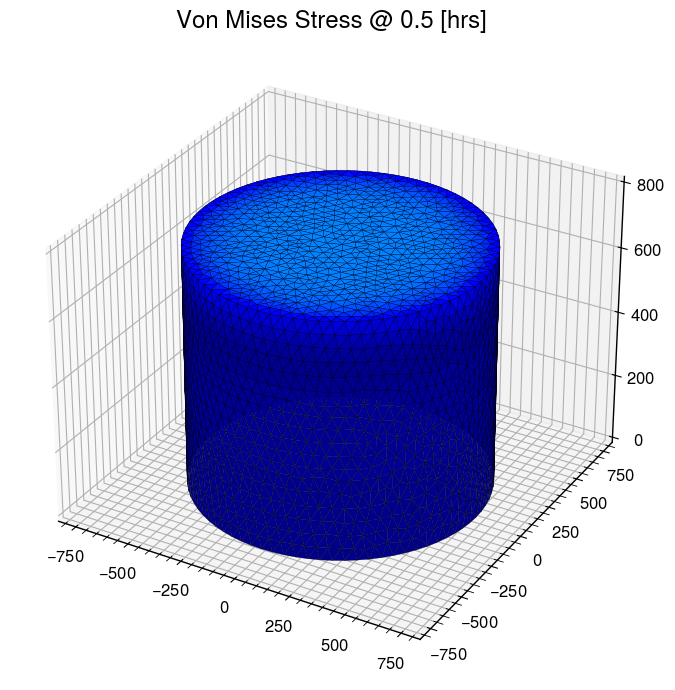

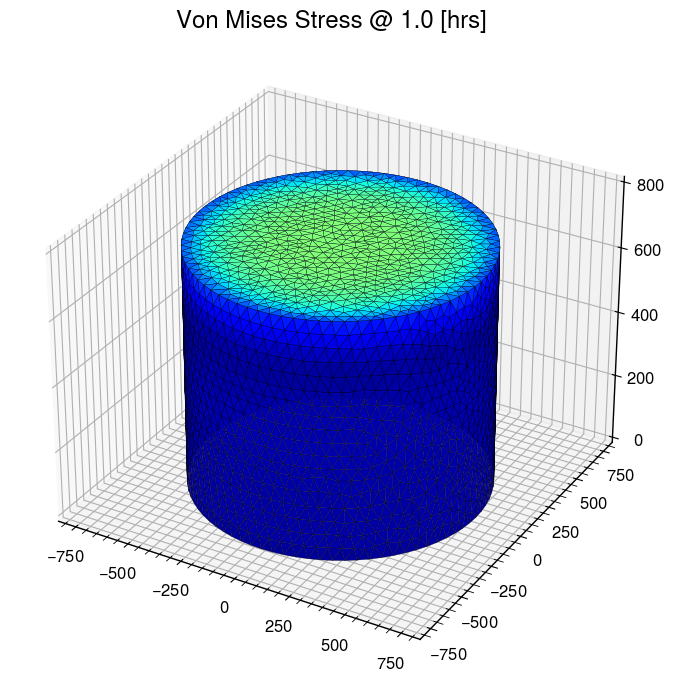

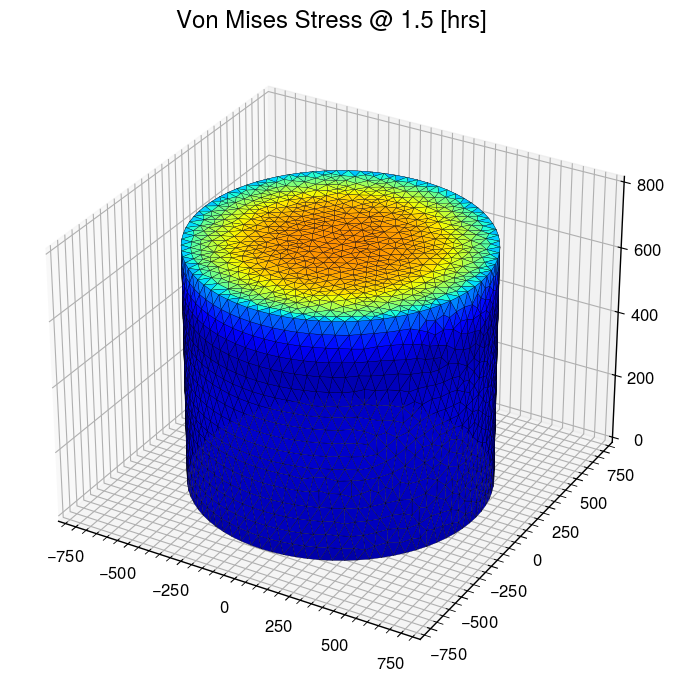

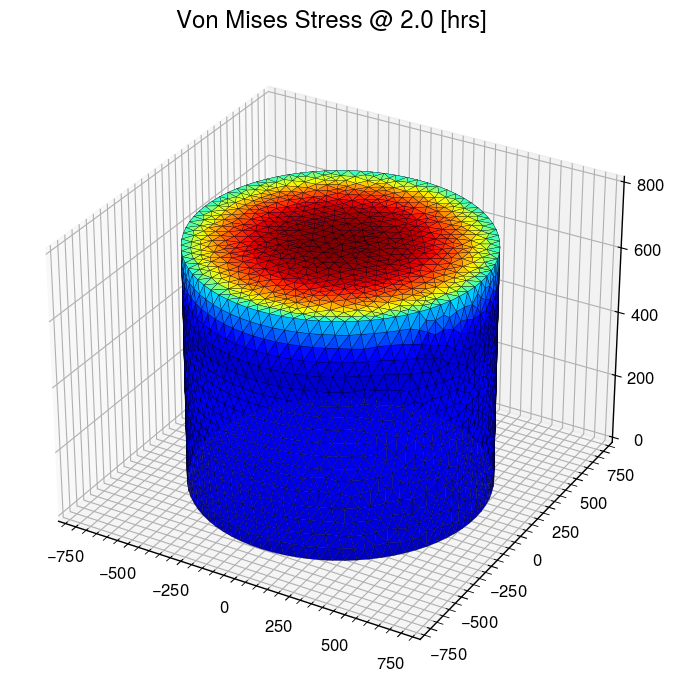

In [5]:
max_vm = np.max([results.vonMises for results in results_list])
min_vm = np.min([results.vonMises for results in results_list])

print(f'Max Von Mises Stress: {max_vm} [MPa]')
print(f'Min Von Mises Stress: {min_vm} [MPa]')

cmap = plt.get_cmap('jet')
norm2 = mcolors.Normalize(vmin=min_vm, vmax=max_vm)

outer_faces_cir = [1, 2] # Face-3: Bottom; Face-2: Top
outer_faces_hex = [2, 1, 3, 7, 8, 6, 5] # Face-4: Bottom; Face-5: Top

nodes_dict = dict(mesh_obj.FemMesh.Nodes)

for i, results_obj in enumerate(results_list):
    
    all_faces_nodes_coords = []
    all_faces_vm = []
    
    for nFace in outer_faces_geo:
    
        face_idx = mesh_obj.FemMesh.getFacesByFace(model_obj.Shape.Faces[nFace-1])
        faces_nodes_coords, vm, displacement, strain = [], [], [], []
        
        for idx_f in face_idx:
            nodes_idx = mesh_obj.FemMesh.getElementNodes(idx_f)
            nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
            
            vm_mean = np.mean([results_obj.vonMises[idx_n-1] for idx_n in nodes_idx])
    
            faces_nodes_coords.append(nodes_coords)
            vm.append(vm_mean)
    
        all_faces_nodes_coords.append(faces_nodes_coords)
        all_faces_vm.append(vm)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for faces_nodes_coords, vm in zip(all_faces_nodes_coords, all_faces_vm):
        poly3d = Poly3DCollection(faces_nodes_coords, facecolors=cmap(norm2(vm)), linewidths=0.2, edgecolors='k')
        ax.add_collection3d(poly3d)
    
    plt.title(f'Von Mises Stress @ {(i+1)/2:.1f} [hrs]')
    fig.tight_layout()
    fig.savefig(f'plots/therm/cir_iso_vonmises_{timeArray[i]}.pdf', dpi=fig.dpi)
    plt.show()

Max Nodal Displacement: 0.3694505888251499 [mm]
Min Nodal Displacement: 0.0 [mm]


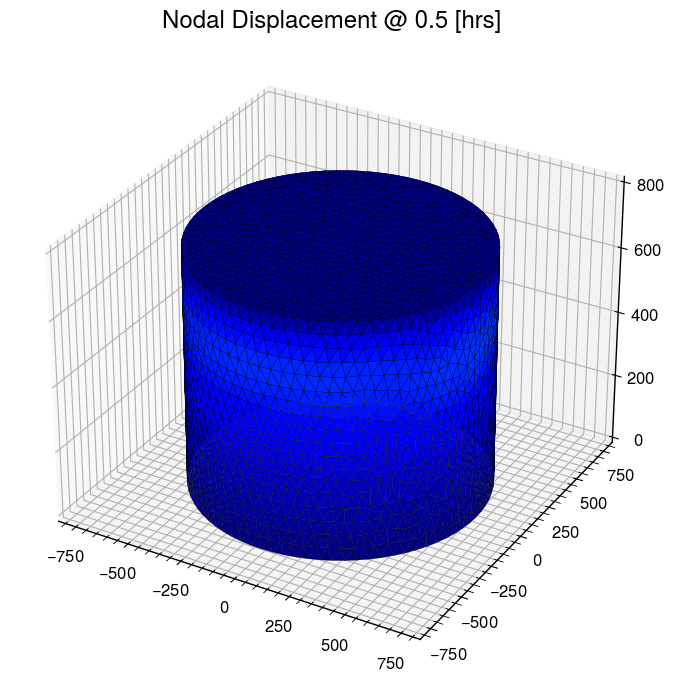

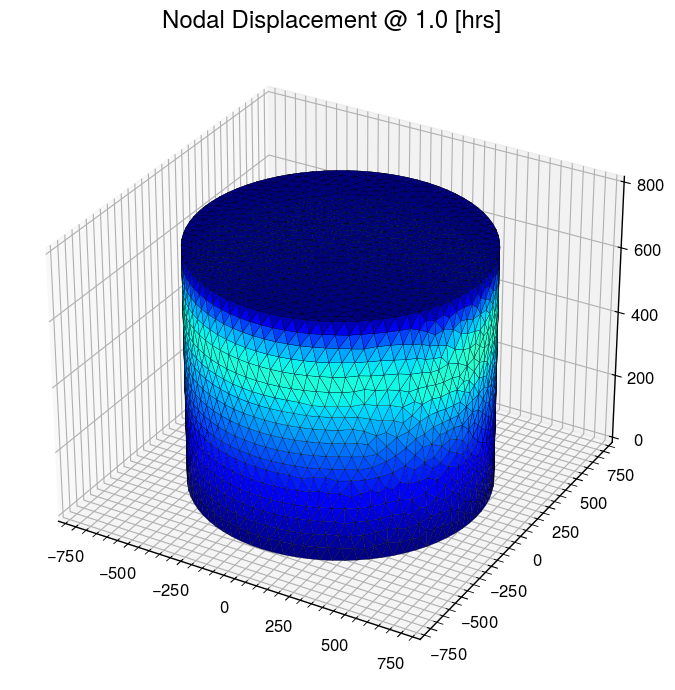

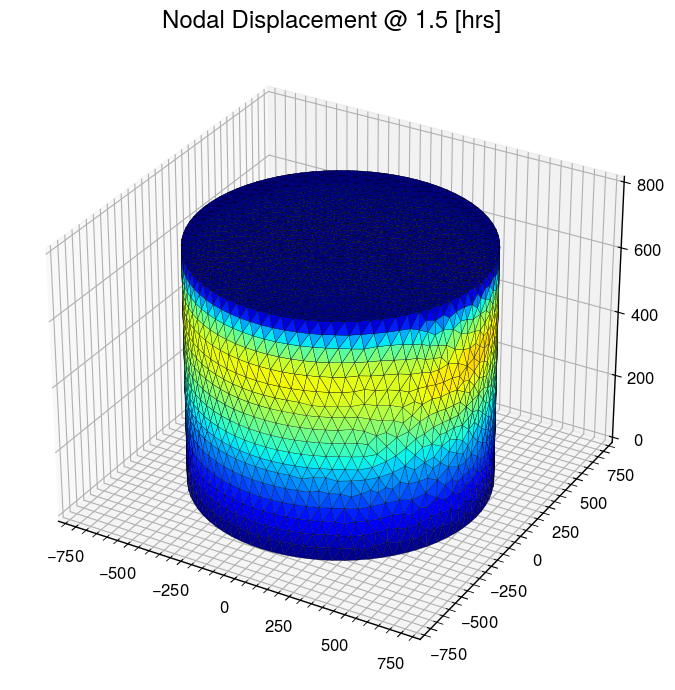

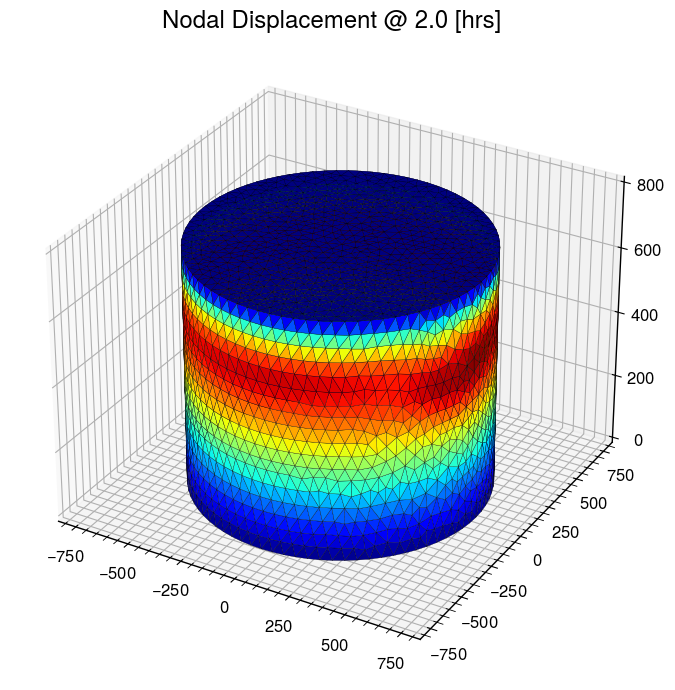

In [6]:
max_vm = np.max([results.DisplacementLengths for results in results_list])
min_vm = np.min([results.DisplacementLengths for results in results_list])

print(f'Max Nodal Displacement: {max_vm} [mm]')
print(f'Min Nodal Displacement: {min_vm} [mm]')

cmap = plt.get_cmap('jet')
norm2 = mcolors.Normalize(vmin=min_vm, vmax=max_vm)

outer_faces_cir = [1, 2] # Face-3: Bottom; Face-2: Top
outer_faces_hex = [2, 1, 3, 7, 8, 6, 5] # Face-4: Bottom; Face-5: Top

nodes_dict = dict(mesh_obj.FemMesh.Nodes)

for i, results_obj in enumerate(results_list):
    
    all_faces_nodes_coords = []
    all_faces_vm = []
    
    for nFace in outer_faces_geo:
    
        face_idx = mesh_obj.FemMesh.getFacesByFace(model_obj.Shape.Faces[nFace-1])
        faces_nodes_coords, vm, displacement, strain = [], [], [], []
        
        for idx_f in face_idx:
            nodes_idx = mesh_obj.FemMesh.getElementNodes(idx_f)
            nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
            
            vm_mean = np.mean([results_obj.DisplacementLengths[idx_n-1] for idx_n in nodes_idx])
    
            faces_nodes_coords.append(nodes_coords)
            vm.append(vm_mean)
    
        all_faces_nodes_coords.append(faces_nodes_coords)
        all_faces_vm.append(vm)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for faces_nodes_coords, vm in zip(all_faces_nodes_coords, all_faces_vm):
        poly3d = Poly3DCollection(faces_nodes_coords, facecolors=cmap(norm2(vm)), linewidths=0.2, edgecolors='k')
        ax.add_collection3d(poly3d)
    
    plt.title(f'Nodal Displacement @ {(i+1)/2:.1f} [hrs]')
    fig.tight_layout()
    fig.savefig(f'plots/therm/cir_iso_displacement_{timeArray[i]}.pdf', dpi=fig.dpi)
    plt.show()

# Transient plots

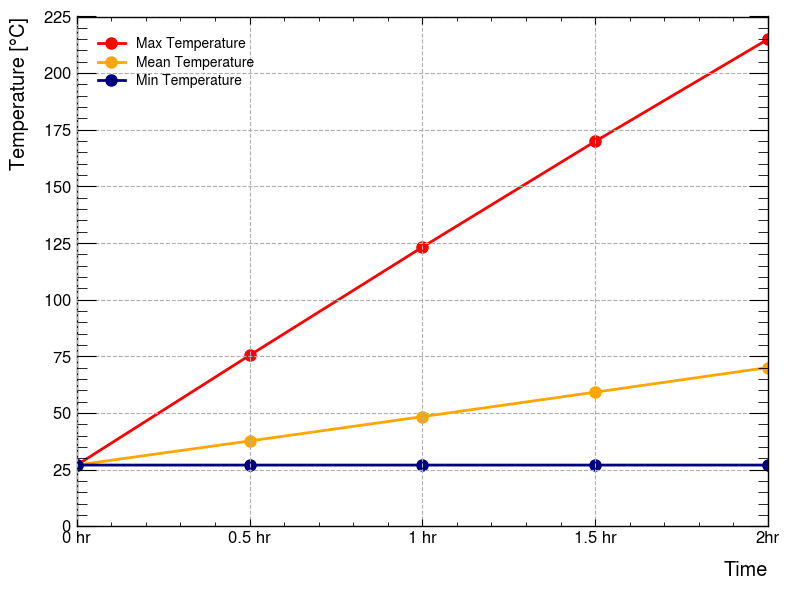

In [5]:
max_temp = [300.15]
min_temp = [300.15]
mean_temp = [300.15]

for results in results_list:
    max_temp = np.append(max_temp, np.max(results.Temperature))
    min_temp = np.append(min_temp, np.min(results.Temperature))
    mean_temp = np.append(mean_temp, np.mean(results.Temperature))

hrs = ['0 hr', '0.5 hr', '1 hr', '1.5 hr', '2hr']

plt.plot(hrs, max_temp-273.15, label='Max Temperature', marker='o', color='r')
plt.plot(hrs, mean_temp-273.15, label='Mean Temperature', marker='o', color='orange')
plt.plot(hrs, min_temp-273.15, label='Min Temperature', marker='o', color='navy')
plt.grid(ls='--')
plt.legend()
plt.ylabel('Temperature [°C]')
plt.xlabel('Time')
fig = plt.gcf()
fig.tight_layout()
#fig.savefig(f'plots/therm/cir_temperature.pdf', dpi=fig.dpi)
plt.show()

In [7]:
timeEnd = 7_200 # 2hrs
timeStep = 1_800 # 1/2 hr

timeArray = np.arange(timeStep, timeEnd+timeStep, timeStep, dtype=int)

doc_hex = FreeCAD.open(f'files/hex_1250/hex_1250_therm.FCStd')
doc_cir = FreeCAD.open(f'files/cir_1250/cir_1250_therm.FCStd')

results_list_hex = [doc_hex.getObject(f'CCX_Time_{time}_0_Results') for time in timeArray]
results_list_cir = [doc_cir.getObject(f'CCX_Time_{time}_0_Results') for time in timeArray]
mesh_obj_hex = doc_hex.getObject('MeshGmsh')
mesh_obj_cir = doc_cir.getObject('MeshGmsh')

max_vm_hex = [0]
min_vm_hex = [0]
mean_vm_hex = [0]

max_vm_cir = [0]
min_vm_cir = [0]
mean_vm_cir = [0]

for results in results_list_hex:
    max_vm_hex = np.append(max_vm_hex, np.max(results.vonMises))
    min_vm_hex = np.append(min_vm_hex, np.min(results.vonMises))
    mean_vm_hex = np.append(mean_vm_hex, np.mean(results.vonMises))

for results in results_list_cir:
    max_vm_cir = np.append(max_vm_cir, np.max(results.vonMises))
    min_vm_cir = np.append(min_vm_cir, np.min(results.vonMises))
    mean_vm_cir = np.append(mean_vm_cir, np.mean(results.vonMises))

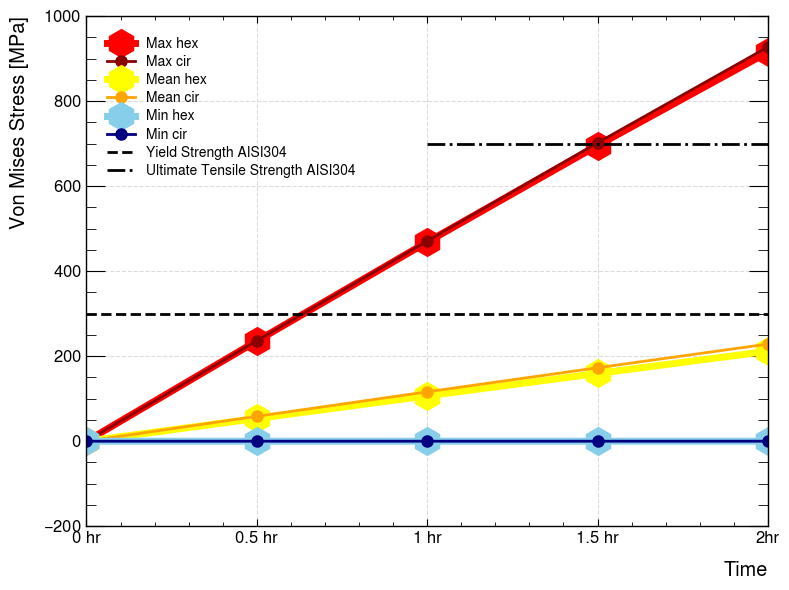

In [34]:
plt.plot(hrs, max_vm_hex, label='Max hex', marker='h', color='red', markersize=20, lw=5)
plt.plot(hrs, max_vm_cir, label='Max cir', marker='o', color='darkred')

plt.plot(hrs, mean_vm_hex, label='Mean hex', marker='h', color='yellow', markersize=20, lw=5)
plt.plot(hrs, mean_vm_cir, label='Mean cir', marker='o', color='orange')

plt.plot(hrs, min_vm_hex, label='Min hex', marker='h', color='skyblue', markersize=20, lw=5)
plt.plot(hrs, min_vm_cir, label='Min cir', marker='o', color='navy')

plt.axhline(300, color='k', ls='--', label='Yield Strength AISI304')
plt.axhline(700, xmin=0.5, xmax=1, color='k', ls='-.', label='Ultimate Tensile Strength AISI304')
plt.grid(ls='--', color='gainsboro')
plt.legend()
plt.ylabel('Von Mises Stress [MPa]')
plt.xlabel('Time')
plt.gca().set_axisbelow(True)
fig = plt.gcf()
fig.tight_layout()
fig.savefig(f'terribleplot.pdf', dpi=fig.dpi)
plt.show()

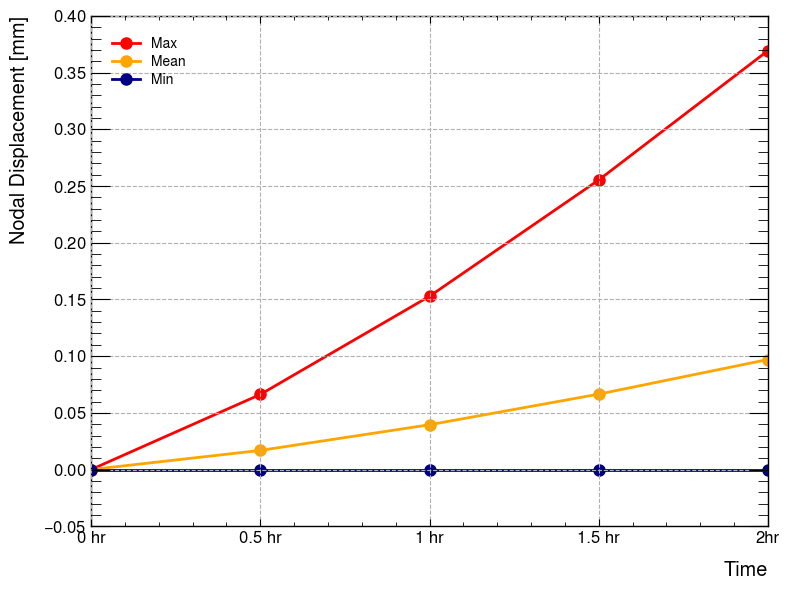

In [9]:
max_d = [0]
min_d = [0]
mean_d = [0]

for results in results_list:
    max_d = np.append(max_d, np.max(results.DisplacementLengths))
    min_d = np.append(min_d, np.min(results.DisplacementLengths))
    mean_d = np.append(mean_d, np.mean(results.DisplacementLengths))

plt.plot(hrs, max_d, label='Max', marker='o', color='r')
plt.plot(hrs, mean_d, label='Mean', marker='o', color='orange')
plt.plot(hrs, min_d, label='Min', marker='o', color='navy')
plt.grid(ls='--')
plt.legend()
plt.ylabel('Nodal Displacement [mm]')
plt.xlabel('Time')
fig = plt.gcf()
fig.tight_layout()
fig.savefig(f'plots/therm/cir_displacements.pdf', dpi=fig.dpi)
plt.show()